In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/student/student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
df['is_GP'] = np.where(df['school'] == 'GP', 1, 0)
df['is_MS'] = np.where(df['school'] == 'MS', 1, 0)

df.filter(items=['school', 'is_GP', 'is_MS'])

,school,is_GP,is_MS
0,GP,1,0
1,GP,1,0
2,GP,1,0
3,GP,1,0
4,GP,1,0
...,...,...,...
390,MS,0,1
391,MS,0,1
392,MS,0,1
393,MS,0,1


In [3]:
X = df.filter(items=['is_GP', 'is_MS']).to_numpy()
Y = df.filter(items=['G3']).to_numpy()

In [4]:
X.shape, Y.shape

((395, 2), (395, 1))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((316, 2), (79, 2), (316, 1), (79, 1))

In [6]:
from neural_network import NeuralNetwork
from loss.mse import MSE
from layer import Layer
from activation.tanh import Tanh
from activation.relu import ReLU


nn = NeuralNetwork(MSE)
nn.add(Layer(2, 2))
nn.add(Tanh())
nn.add(Layer(2, 1))


print(nn)
losses = nn.train(X_train, Y_train, epochs=1000, learning_rate=0.001)
print(nn)

-----
Layer (2, 2)
Weights
[[-0.49202912  0.8952668 ]
 [-0.08073072  0.32031097]]
Biases
[[0. 0.]]
-----
Tanh
-----
Layer (2, 1)
Weights
[[0.17681374]
 [0.13588884]]
Biases
[[0.]]
-----

-----
Layer (2, 2)
Weights
[[-1.14525396  1.50684738]
 [-0.39847016  0.6982809 ]]
Biases
[[-0.97096427  0.98955051]]
-----
Tanh
-----
Layer (2, 1)
Weights
[[-2.65220939]
 [ 3.80104603]]
Biases
[[4.17495996]]
-----



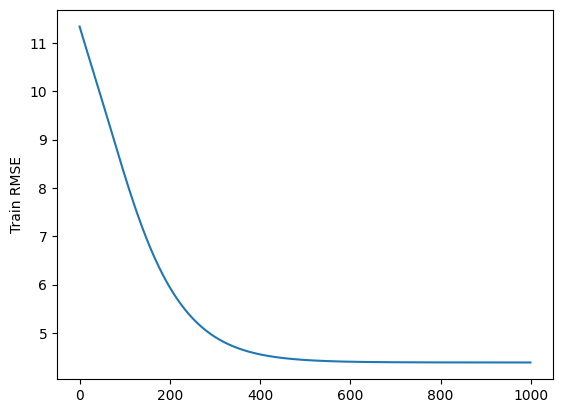

train: 3.2442764011118426 4.388958631821241
test: 4.097642686877464 5.2386925983354935


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from loss.mae import MAE

plt.ylabel('Train RMSE')
plt.plot(np.sqrt(losses))
plt.show()

prediction = nn.forward(X_test)
mse = MSE.loss(prediction, Y_test)
rmse = np.sqrt(mse)
mae = MAE().loss(prediction, Y_test)
print('train:', MAE().loss(nn.forward(X_train), Y_train), np.sqrt(MSE.loss(nn.forward(X_train), Y_train)))
print('test:', mae, rmse)

In [8]:
nn.forward(np.array([[1, 0], [0, 1]]))

array([[10.50106807],
       [10.05477816]])

In [12]:
np.average(Y)

10.415189873417722